Import some modules that we will use for scientific computing and plotting 

In [303]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

Make and print a random matrix

In [255]:
x = -10 + 20*np.random.rand(2 , 2)
print(x)

[[-1.24  4.02]
 [ 6.43  6.11]]


Check matrix type

In [256]:
x.dtype

dtype('float64')

Can also cast matricies and arrays to different type

In [257]:
x.astype(int)

array([[-1,  4],
       [ 6,  6]])

Defining a function (indentation is important) with defined in

In [258]:
def multiply_input(x,y=5):
    return x*y # note that this for matrix matrix or matrix-vector this is equivalent to .* in MATLAB 

In [259]:
multiply_input(x)

array([[ -6.19,  20.12],
       [ 32.16,  30.53]])

In [260]:
multiply_input(x,2)

array([[ -2.48,   8.05],
       [ 12.87,  12.21]])

Anonymous function using $\lambda$ operator

In [261]:
 f = lambda a, b : a + b

In [262]:
f(1,1)

2

Importing audio files

In [263]:
from scipy.io import wavfile 

In [284]:
fs, y = wavfile.read('test.wav')

In [265]:
from IPython.display import Audio
Audio(y, rate=fs)

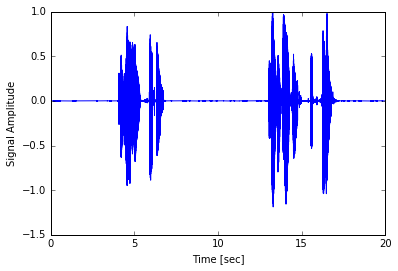

In [302]:
plt.plot(arange(0,len(y))/fs,y/y.max())
plt.ylabel('Signal Amplitude')
plt.xlabel('Time [sec]')

In [287]:
%matplotlib qt
plt.plot(arange(0,len(y))/fs,y/y.max())

In [268]:
%matplotlib inline

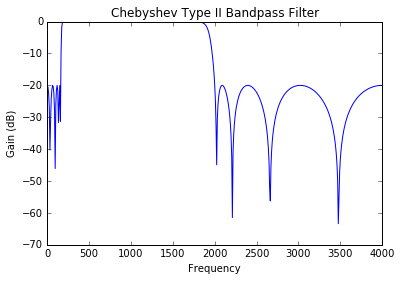

In [277]:
fs     = 8e3;  # sampling frequency
N      = 800;  
f_low   = 160;  # Lower band-edge: 160 Hz
f_high  = 2000; # Upper band-edge: 2000 Hz
delayS = 7;
Ast    = 20;   # 20 dB stopband attenuation
Nfilt  = 8;    # Filter order

nyquist_rate = 0.5 * fs
low = f_low / nyquist_rate
high = f_high / nyquist_rate

b, a = signal.cheby2(Nfilt, Ast, [low, high], 'bandpass', analog=False)
w, h = signal.freqz(b, a)
w = (w/pi)*(fs/2)
plt.plot(w, 20 * np.log10(abs(h)))
plt.ylabel('Gain (dB)')
plt.xlabel('Frequency')
plt.title('Chebyshev Type II Bandpass Filter')
plt.show()

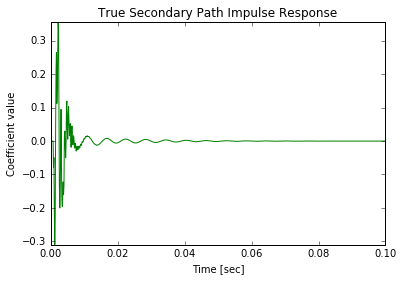

In [270]:
# Generate noise
noise_sig = np.concatenate((np.zeros(delayS), 
                    np.log(0.99*np.random.rand(N-delayS)+0.01)*np.sign(np.random.normal(0,1,N-delayS))*
                    np.exp(-0.1*arange(0,N-delayS))), axis=0)

# Filter noise to generate impulse response
H = lfilter(b,a,noise_sig)
H /= np.linalg.norm(H)

t = arange(0,N)/fs
plt.plot(t,H,color='g')
plt.ylabel('Coefficient value')
plt.xlabel('Time [sec]')
plt.title('True Secondary Path Impulse Response')
plt.axis('tight')
plt.show()

Estimating the Secondary Propagation Path

In [271]:
ntrS = 30000
s = np.random.normal(0,1,ntrS)

In [272]:
dS = lfilter(H,1,s) +  0.01*np.random.normal(0,1,ntrS);

Designing the Secondary Propagation Path Estimate with NLMS style filtering

In [295]:
M = 250;
muS = 0.1;
W = np.random.rand(M)
yest = np.zeros(len(s))
error = yest.copy()
for idx in range(M,len(dS)):
    error[idx] = dS[idx] - W.dot(s[idx:idx-M:-1])
    yest[idx+M:idx:-1] = W.dot(s[idx:idx-M:-1])
    W += muS*error[idx]*s[idx:idx-M:-1]/np.linalg.norm(s[idx:idx-M:-1])

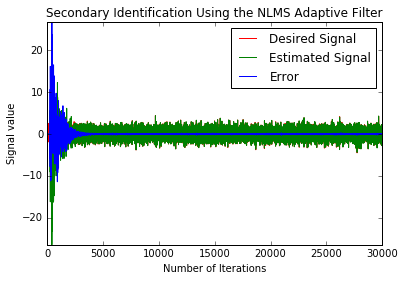

In [300]:
%matplotlib inline
n = range(0,len(s))
plt.plot(n, dS, 'r',n,yest,'g', n, error, 'b')
plt.ylabel('Signal value')
plt.xlabel('Number of Iterations')
plt.title('Secondary Identification Using the NLMS Adaptive Filter')
plt.axis('tight')
legend( ('Desired Signal', 'Estimated Signal', 'Error'), loc='upper right')
plt.show()